In [2]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ker1 = GPy.kern.RBF(1)  # Equivalent to ker1 = GPy.kern.rbf(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .75, lengthscale=2.)
ker3 = GPy.kern.RBF(1, .5, .5)

In [4]:
print(ker2)

  rbf.         |  value  |  constraints  |  priors
  variance     |   0.75  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


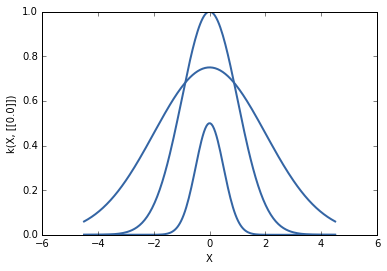

In [5]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())
plt.show()

 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


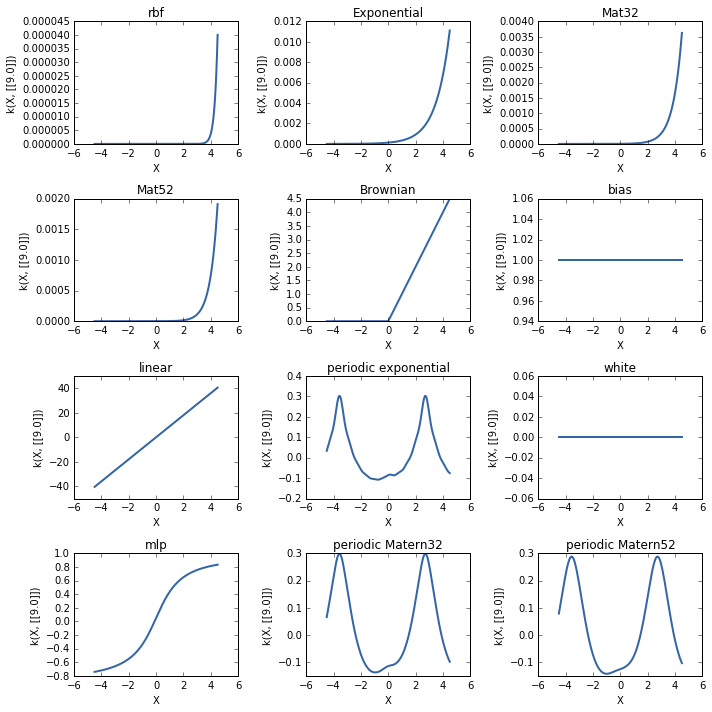

In [7]:
figure, axes = plt.subplots(4, 3, figsize=(10,10), tight_layout=True)
kerns = [
    GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), 
    GPy.kern.Matern52(1), GPy.kern.Brownian(1), GPy.kern.Bias(1), 
    GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1),
    GPy.kern.MLP(1), GPy.kern.PeriodicMatern32(1), GPy.kern.PeriodicMatern52(1),
]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=9)
    a.set_title(k.name.replace('_', ' '))

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.                 |  value  |  constraints  |  priors
  Mat32.variance       |   0.75  |      +ve      |        
  Mat32.lengthscale    |    0.5  |      +ve      |        
  Mat32_1.variance     |    2.0  |      +ve      |        
  Mat32_1.lengthscale  |    2.0  |      +ve      |        


 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


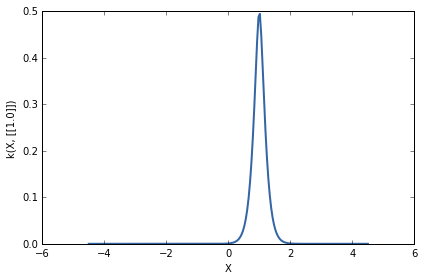

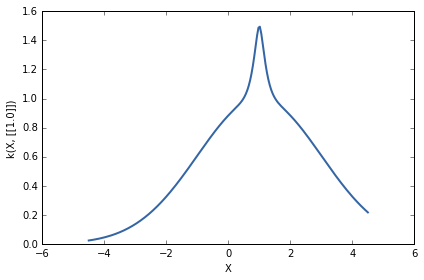

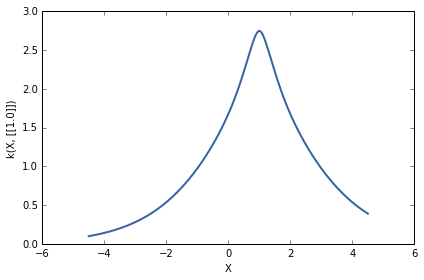

In [6]:
# Combining Kernels
# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
print(k_prod)
k_prod.plot()

# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
print(k_add)
k_add.plot()

k1 = GPy.kern.Matern32(1, 0.75, 0.5)
k2 = GPy.kern.Matern32(1, 2, 2)
k_add = k1 + k2
print(k_add)
k_add.plot()

 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


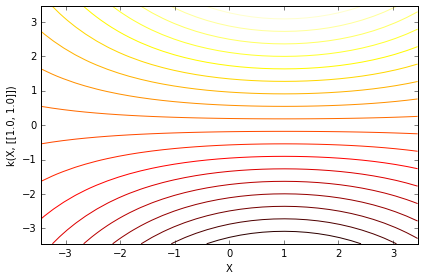

In [28]:
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k = k1 * k2
k.plot(x=np.ones((1,2)))